In [108]:
import pandas as pd 
import seaborn as sns

# Morocco Electricity Consumption  
## Project Aim  
The aim of this project is to analyze seasonality in electricity consumption to help identify peak load periods across:  
- **Hours of the day**  
- **Days of the week**  
This analysis will assist in making strategic investments to prevent outages during these peak times.

In [110]:
#Read the powerconsumption.csv file and extract the columns we are going to use, cast 'Datetime' as datetime datatype

cols = ("Datetime", "PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3")
electricity = pd.read_csv("C:/Users/User/powerconsumption.csv", usecols = cols, parse_dates=["Datetime"], dayfirst=True ).assign(Total_consumption = electricity["PowerConsumption_Zone1"] + electricity["PowerConsumption_Zone2"]
                                       + electricity["PowerConsumption_Zone3"],
                   Hours_of_day = electricity["Datetime"].dt.hour,
                   Day_of_week = electricity["Datetime"].dt.dayofweek)  #Create two important columns for Analysis "total_consumption", "hours" and "day_of_week"
electricity.head()


,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Total_consumption,Hours_of_day,Day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


## Visualize consumption over time

### Objective 2: 
- Resample the data into 1 hour increments 
- Filter the data down to the month of **January 2017** column  
- Create a stacked line chart using the 'Power Consumption' columns

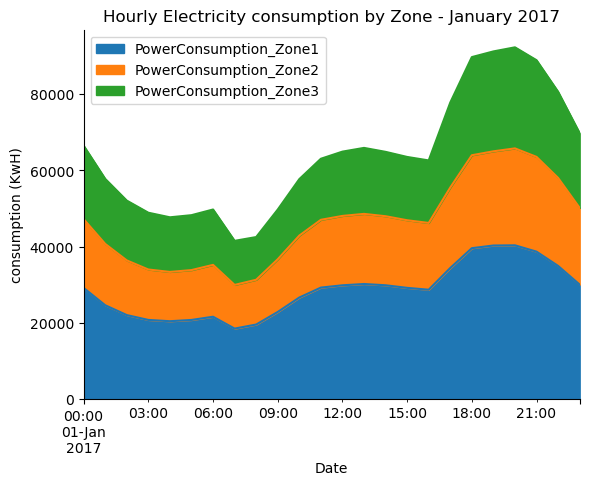

In [131]:
(electricity.set_index("Datetime")
.resample('h')
 ["PowerConsumption_Zone1","PowerConsumption_Zone2","PowerConsumption_Zone3"]
 .mean()
 .loc["2017-01-01",:]
 .plot
 .area( title = "Hourly Electricity consumption by Zone - January 2017",
     xlabel ="Date",
     ylabel = "consumption (KwH)"     
 )
)
sns.despine()
 



 

## Visualize consumption seasonality

### Objective 3: 
- Create a pivot table where the rows are day of week, the columns are the hour of day, and the values represent the average total consumption.
- Create a heatmap using the pivot table. 


In [114]:
day_mapping = {0 : "Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}

electricity["Day_of_week"] = electricity["Day_of_week"].map(day_mapping)
electricity["Day_of_week"] = pd.Categorical(
    electricity["Day_of_week"], 
    categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    ordered=True,
    #observed=False
)

In [115]:
electricity.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Total_consumption,Hours_of_day,Day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,Sunday
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,Sunday
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,Sunday
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,Sunday
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,Sunday


Text(0.5, 1.0, 'Power consumption by Day of Week and Hour')

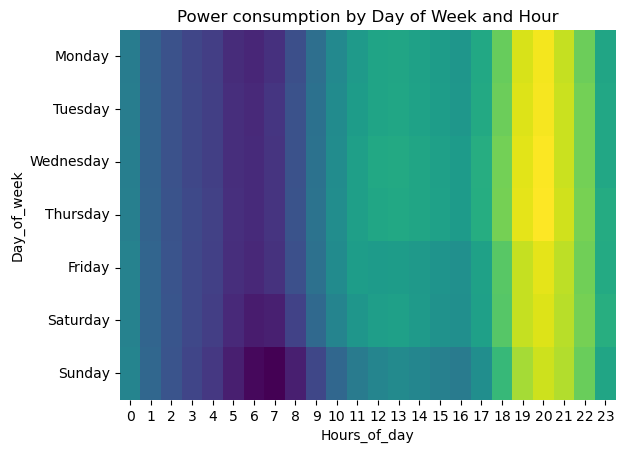

In [117]:
ax =sns.heatmap(
    electricity.pivot_table(
        index="Day_of_week",
        columns="Hours_of_day",
        values="Total_consumption",
        aggfunc="mean",
        observed=False
    ), 
    cbar=None, 
    cmap="viridis"
)
ax.set_title("Power consumption by Day of Week and Hour")

In [129]:
#Average electricity consumption on Monday at 1am 

consumption_Monday = electricity.pivot_table(
        index="Day_of_week",
        columns="Hours_of_day",
        values="Total_consumption",
        aggfunc="mean",
        margins=False,
        observed=False
        ).style.background_gradient(cmap="RdYlGn", axis=None)
consumption_Monday

Hours_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
Monday,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,70626.560317,74607.253456,76959.967440,77116.380158,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
Tuesday,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,71176.975923,74981.588513,76955.507487,77264.300563,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
Wednesday,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,71402.433013,75574.103786,77716.565752,77977.424157,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
Thursday,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,71575.337999,75627.372830,77397.794631,77805.494656,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
Friday,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,71126.536653,75152.185585,74783.463702,74920.935292,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904
Saturday,68991.576226,62628.416936,59321.825090,56745.339022,54816.778024,51275.831269,49144.134609,49769.161118,55718.168776,63423.248858,69739.678141,73688.454730,75493.424363,75800.278752,74654.603723,72910.123153,71972.130743,75921.019762,85309.097439,94902.067927,96852.132434,93754.497597,88284.551471,79287.720731
Sunday,69728.136464,63113.302575,59243.071267,56207.553656,53896.627602,49677.139543,46078.167596,44983.099866,49619.256706,56571.380742,63112.090723,67525.872562,69811.634317,70841.434979,70039.555630,68585.463342,67570.378727,71844.793038,81580.676389,92171.105678,95540.060279,93301.028513,87069.268851,77031.733676


In [128]:
mean_value = electricity[(electricity["Day_of_week"] == "Monday") & (electricity["Hours_of_day"] == 1)]["Total_consumption"].mean()
print(mean_value)

61755.42271672756
